<a href="https://colab.research.google.com/github/uyan21/deepLearningStudy/blob/main/NST(Neural_Style_Transfer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신경망 전이



https://tfhub.dev/

In [40]:
import tensorflow as tf

In [41]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import PIL.Image

In [42]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [43]:
content_path = tf.keras.utils.get_file('472e7f6c33241.jpg', 
                                       'http://www.heraldk.com/wp-content/olddata/uploads/junk/472e7f6c33241.jpg')

style_path = tf.keras.utils.get_file('1.jpg',
                                     'http://cfs12.blog.daum.net/image/6/blog/2008/08/21/17/13/48ad23a5cff6b&filename=1.jpg')

In [44]:
"""
file path에서 이미지 어레이로 가져오고 
최대 사이즈 512로 제한
(1,가,세,채) 로 4차원 배열 만들어주는 함수
"""
def load_img(path_to_img):
  max_dim = 512
  #파일경로에서 tf어레이로 변환로드 
  img = tf.io.read_file(path_to_img)
  #가져온 파일은 16진수 배열 인데 텐서 이미지 어레이로 디코딩한다(RGB 채널 3)
  img = tf.image.decode_image(img, channels=3)
  #이미지 데이터 타입을 0~1 32비트 플롯으로 바꿈(정규화라고 보면됨)
  img = tf.image.convert_image_dtype(img, tf.float32)
  #이거는 이미지 사이즈를 얻기 위함 (577, 700, 3)인데 뒤에 rgb값 -1 줘서 제거 
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  #가로 세로중 큰 사이즈인 722가 나옴
  long_dim = max(shape)
  #512/722
  scale = max_dim / long_dim
  #새로운 모양으로 리사이징 하기위해 scale 곱해서 
  #최대 사이즈 512 안 넘어가게 만든다
  new_shape = tf.cast(shape * scale, tf.int32)
  #리사이즈
  img = tf.image.resize(img, new_shape)
  #레이어에 집어넣을려면 (1,512,512,3) 이런 식이어야 함으로 앞에 none하나 넣고 변환시켜줌
  img = img[tf.newaxis, :]
  return img

In [45]:
def imshow(image, title=None):
  #none,가로,세로,rgb 채널 위에처럼 4차원이면 (1,512,512,3)
  #axis 없애서 3차원으로 변환한다
  #squeeze함수는 배열 차원 줄이는데 쓰임
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)
  #이미지 출력한다
  plt.imshow(image)
  if title:
    plt.title(title)

In [46]:
#연습
max_dim=512
img = tf.io.read_file(content_path)
print(img)
img = tf.image.decode_image(img, channels=3)
print(img.shape)
img = tf.image.convert_image_dtype(img, tf.float32)
#print(img)
shape = tf.cast(tf.shape(img)[:-1], tf.float32)
print(img.shape)
'''
long_dim = max(shape)
scale = max_dim / long_dim
print("scale = "+str(scale))
new_shape = tf.cast(shape * scale, tf.int32)
print("new_shape = "+str(new_shape))
img = tf.image.resize(img, new_shape)
img = img[tf.newaxis, :]
print(img.shape)
'''

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x00\x01\x00\x96\x00\x96\x00\x00\xff\xfe\x00\x1fLEAD Technologies Inc. V1.01\x00\xff\xdb\x00\x84\x00\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x03\x02\x02\x03\x02\x02\x02\x03\x04\x03\x03\x03\x03\x04\x04\x04\x02\x03\x04\x04\x04\x04\x04\x03\x04\x04\x03\x01\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x1

'\nlong_dim = max(shape)\nscale = max_dim / long_dim\nprint("scale = "+str(scale))\nnew_shape = tf.cast(shape * scale, tf.int32)\nprint("new_shape = "+str(new_shape))\nimg = tf.image.resize(img, new_shape)\nimg = img[tf.newaxis, :]\nprint(img.shape)\n'

(449, 512, 3)
(512, 492, 3)


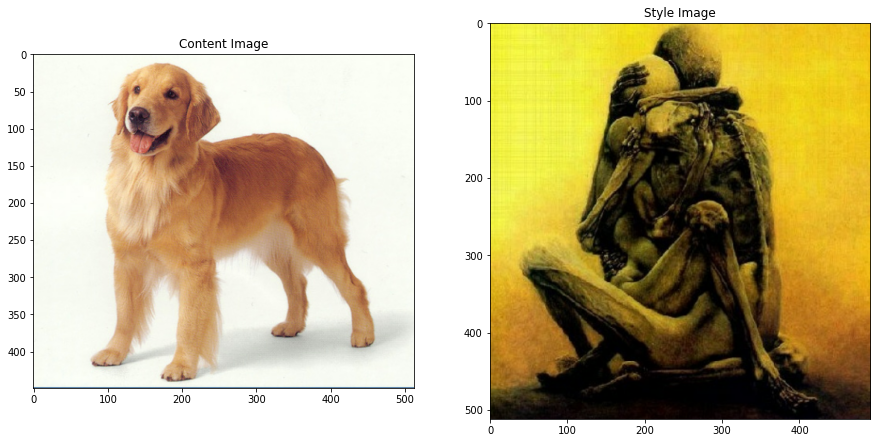

In [55]:
#개 사진하고 화풍 사진 로드 후 배열화
content_image = load_img(content_path)
style_image = load_img(style_path)
mpl.rcParams['figure.figsize'] = (15,15)
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')
#배열 (1,가,세,채) 4차원 배열이었는데 스퀴즈함수써서 3차원됨
print(tf.squeeze(content_image,axis=0).shape)
print(tf.squeeze(style_image,axis=0).shape)

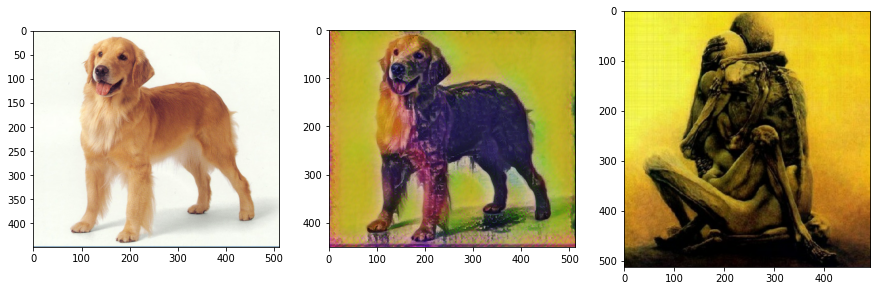

In [59]:
import tensorflow_hub as hub

if hub_module==None:
  hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(content_image, style_image)[0]

plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(content_image,axis=0))
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(stylized_image,axis=0))
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(style_image,axis=0))

#밑으로는 레이어 분석


In [11]:
x_ = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x_, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [12]:
print(x_.shape)
print(x.shape)
print(content_image.shape)
#은닉층 레이어
print(prediction_probabilities.shape)

(1, 449, 512, 3)
(1, 224, 224, 3)
(1, 449, 512, 3)
(1, 1000)


In [13]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
for i in predicted_top_5:
  print(i)
print(prediction_probabilities.numpy().shape)

('n02099601', 'golden_retriever', 0.93519485)
('n02100877', 'Irish_setter', 0.018997615)
('n02091831', 'Saluki', 0.006202885)
('n04409515', 'tennis_ball', 0.0058718664)
('n02099267', 'flat-coated_retriever', 0.004891328)
(1, 1000)


In [14]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
print(vgg)
from keras import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(1))
model.add(Dense(64))
print()
for layer in model.layers:
  print(layer.name)
print()
for layer in vgg.layers:
  print(layer.name,end=' ')
vgg.summary()


dense
dense_1

input_2 block1_conv1 block1_conv2 block1_pool block2_conv1 block2_conv2 block2_pool block3_conv1 block3_conv2 block3_conv3 block3_conv4 block3_pool block4_conv1 block4_conv2 block4_conv3 block4_conv4 block4_pool block5_conv1 block5_conv2 block5_conv3 block5_conv4 block5_pool Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (Non

In [15]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [16]:
def vgg_layers(layer_names):
  """ 중간층의 출력값을 배열로 반환하는 vgg 모델을 만듭니다."""
  # 이미지넷 데이터셋에 사전학습된 VGG 모델을 불러옵니다
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [17]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

# 각 층의 출력에 대한 통계량을 살펴봅니다
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  크기: ", output.numpy().shape)
  print("  최솟값: ", output.numpy().min())
  print("  최댓값: ", output.numpy().max())
  print("  평균: ", output.numpy().mean())
  print()

block1_conv1
  크기:  (1, 512, 492, 64)
  최솟값:  0.0
  최댓값:  647.32
  평균:  33.065197

block2_conv1
  크기:  (1, 256, 246, 128)
  최솟값:  0.0
  최댓값:  4187.5327
  평균:  135.03604

block3_conv1
  크기:  (1, 128, 123, 256)
  최솟값:  0.0
  최댓값:  11119.6045
  평균:  106.72712

block4_conv1
  크기:  (1, 64, 61, 512)
  최솟값:  0.0
  최댓값:  13971.03
  평균:  407.18475

block5_conv1
  크기:  (1, 32, 30, 512)
  최솟값:  0.0
  최댓값:  3201.2314
  평균:  28.554485

